This notebook generates presentation-ready visuals for EDA and model results.

**Visuals:**
- Distribution of team win percentages.
- Feature correlation heatmap.
- Top 10 predicted teams for the 2023 season by win probability.

**Tools:**
- seaborn, matplotlib

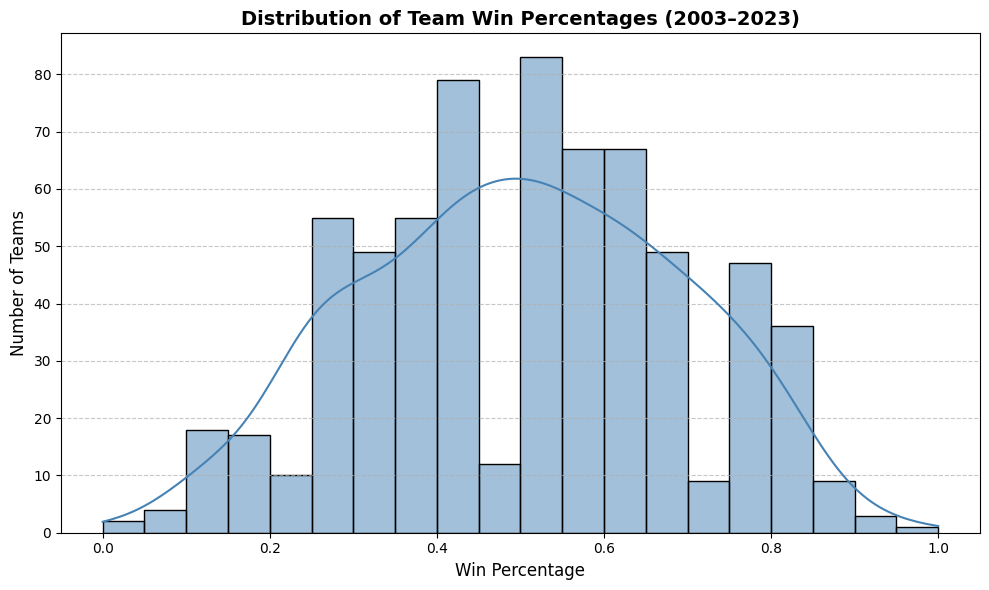

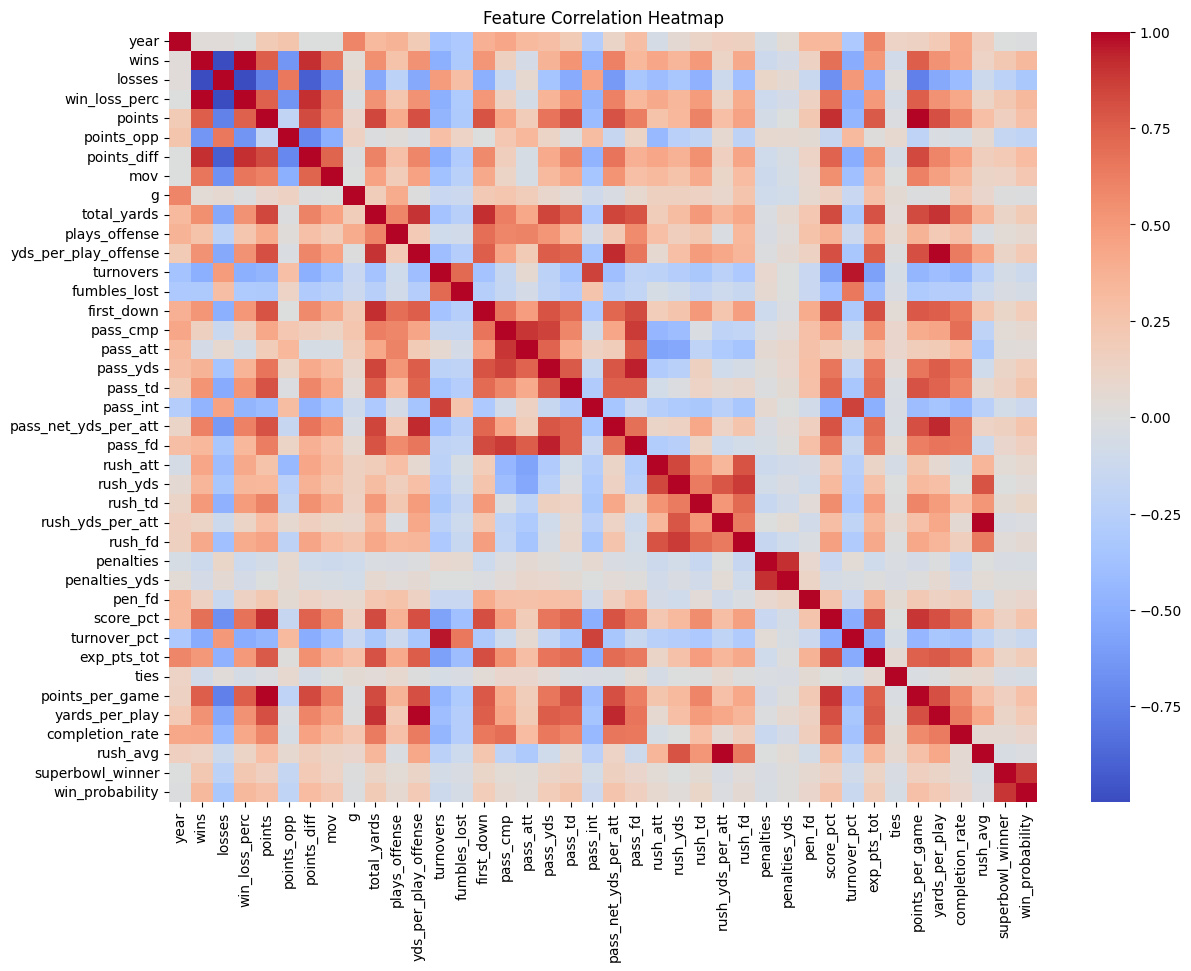

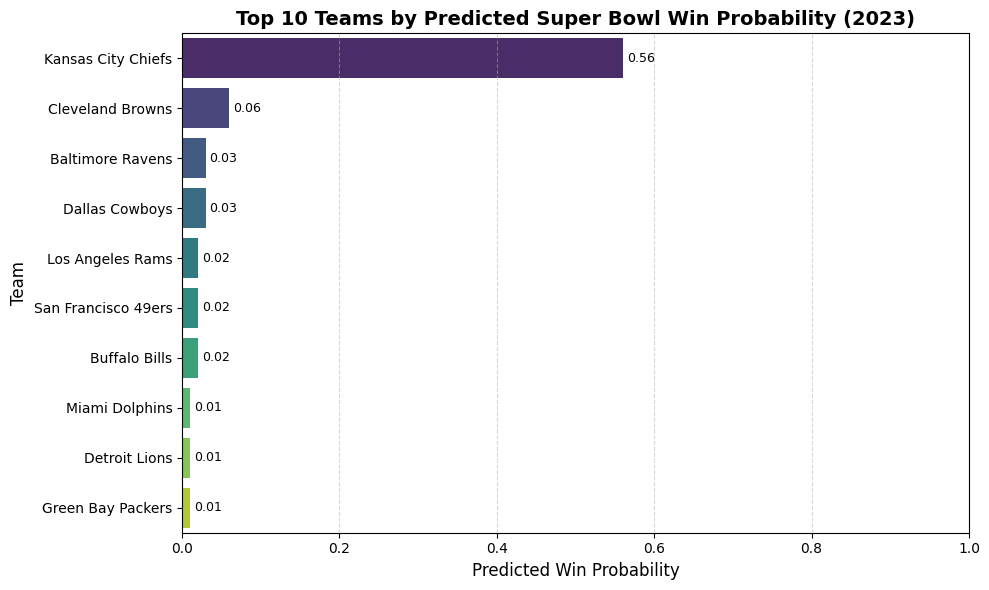

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/processed/nfl_team_stats_2003_2023_with_probs.csv')


plt.figure(figsize=(10, 6))
sns.histplot(df['win_loss_perc'], bins=20, kde=True, color='steelblue')
plt.title('Distribution of Team Win Percentages (2003–2023)', fontsize=14, fontweight='bold')
plt.xlabel('Win Percentage', fontsize=12)
plt.ylabel('Number of Teams', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../visuals/win_percentage_distribution.png')
plt.show()

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.savefig('../visuals/feature_correlation_heatmap.png')
plt.show()


df_2023 = df[df['year'] == 2023].sort_values('win_probability', ascending=False).head(10)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df_2023,
    x='win_probability',
    y='team',
    hue='team',
    palette='viridis',
    legend=False
)


for i, row in enumerate(df_2023.itertuples()):
    barplot.text(row.win_probability + 0.005, i, f"{row.win_probability:.2f}", va='center', fontsize=9)

plt.title('Top 10 Teams by Predicted Super Bowl Win Probability (2023)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Win Probability', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.xlim(0, 1)  # Normalize x-axis
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('../visuals/top_teams_2023_predictions.png')
plt.show()